# CAR PRICE PREDICTION

The "Car Price Prediction" dataset encompasses a diverse array of data related to car models and features, sourced from various online platforms. Its main objective is to provide researchers and data scientists with a comprehensive toolset for constructing regression models to accurately predict car prices. With its extensive range of attributes, the dataset enables thorough analysis of trends and patterns within the dynamic automotive market. This dataset holds substantial value for individuals involved in regression analysis or those seeking insights into the intricate workings of the automotive industry.

# 1. Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
from sklearn import metrics
%matplotlib inline
import datetime as dt

In [3]:
# Supress the warnings
import warnings
warnings.filterwarnings('ignore')

# 2. Reading the concerned dataset

In [4]:
# Reading the dataset
car_df= pd.read_csv('car data.csv')

# 3. Data understanding

Let us inspect the various aspects of car dataframe

In [5]:
# Inspecting the first 5 rows of the dataframe
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
# Shape of dataframe
car_df.shape

(301, 9)

The number of rows are = 301

The number of columns are = 9

In [7]:
# Size of dataframe
car_df.size

2709

In [8]:
## Information about the dataset
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
# Description of dataset
car_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


# 4. Data handling

Let us now proceed further and carry out some exploratory data analysis on our dataset to understand our data better.

### a) Handling Null values

In [12]:
car_df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

The DataFrame is free of null values, indicating a complete and reliable dataset.

### b) Handling Categorical values

In [13]:
## Checking categories available in categorical columns

print(car_df["Fuel_Type"].unique())
print(car_df["Seller_Type"].unique())
print(car_df["Transmission"].unique())
print(car_df["Owner"].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [14]:
## Checking the distribution of categorical data

print(car_df.Fuel_Type.value_counts())
print(car_df.Seller_Type.value_counts())
print(car_df.Transmission.value_counts())
print(car_df.Owner.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64
Owner
0    290
1     10
3      1
Name: count, dtype: int64


- 'Year' and 'Owner' are ordinal categorical variables with a clear hierarchy among their categories.
- Newer cars generally have higher prices compared to older ones.
- The number of past owners is inversely correlated with the car's price.
- To enhance the dataset, a new label 'Age' can be derived by subtracting the 'Year' variable from the present year.

In [15]:
car_df['Age'] = dt.date.today().year - car_df['Year']

- The 'Car_Name' and 'Year' columns are not required for the analysis.

In [16]:
car_df.drop(['Year', 'Car_Name'], axis=1, inplace=True)

- The variables 'Fuel_Type', 'Seller_Type', and 'Transmission' represent nominal categorical values. It can be observed that there is no inherent hierarchy among the categories of these variables.

In [17]:
car_df_dummy = pd.get_dummies(data = car_df) 

In [18]:
car_df_dummy.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,9,False,False,True,True,False,False,True
1,4.75,9.54,43000,0,10,False,True,False,True,False,False,True
2,7.25,9.85,6900,0,6,False,False,True,True,False,False,True
3,2.85,4.15,5200,0,12,False,False,True,True,False,False,True
4,4.60,6.87,42450,0,9,False,True,False,True,False,False,True


In [19]:
car_df_dummy.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,-0.025164,0.552339,-0.540571,0.550724,-0.550724,0.367128,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,-0.011500,0.473306,-0.465244,0.512030,-0.512030,0.348715,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.012223,0.172515,-0.172874,0.101419,-0.101419,0.162510,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.014272,-0.053469,0.055687,-0.124269,0.124269,0.050316,-0.050316
Age,-0.236141,0.047584,0.524342,0.182104,1.000000,0.017790,-0.064315,0.059959,-0.039896,0.039896,0.000394,-0.000394
Fuel_Type_CNG,-0.025164,-0.011500,0.012223,-0.014272,0.017790,1.000000,-0.040808,-0.160577,0.060300,-0.060300,-0.032018,0.032018
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,-0.040808,1.000000,-0.979648,0.350467,-0.350467,0.098643,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.160577,-0.979648,1.000000,-0.358321,0.358321,-0.091013,0.091013
Seller_Type_Dealer,0.550724,0.512030,0.101419,-0.124269,-0.039896,0.060300,0.350467,-0.358321,1.000000,-1.000000,0.063240,-0.063240
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.060300,-0.350467,0.358321,-1.000000,1.000000,-0.063240,0.063240


In [20]:
car_df_dummy.corr()["Selling_Price"]

Selling_Price             1.000000
Present_Price             0.878983
Kms_Driven                0.029187
Owner                    -0.088344
Age                      -0.236141
Fuel_Type_CNG            -0.025164
Fuel_Type_Diesel          0.552339
Fuel_Type_Petrol         -0.540571
Seller_Type_Dealer        0.550724
Seller_Type_Individual   -0.550724
Transmission_Automatic    0.367128
Transmission_Manual      -0.367128
Name: Selling_Price, dtype: float64

### c) Handling Outliers

In [21]:
def Detect_Fix_Outliers_IQR(data, col_name):
    q3, q1 = data[col_name].quantile(0.75), data[col_name].quantile(0.25)
    high_threshold, low_threshold = q3 + 1.5*(q3 - q1), q1 - 1.5*(q3 - q1)

    outlier_booleans = np.logical_or(data[col_name].values > high_threshold, data[col_name].values < low_threshold)
    outlier_indexes = np.where(outlier_booleans)[0]

    print(f" Number of Outlier Detected : {len(outlier_indexes)}")

    data[col_name] = np.clip(data[col_name], low_threshold, high_threshold)

    return data
     

In [22]:
cols = ['Selling_Price', 'Present_Price', 'Kms_Driven']

for col in cols:
    Detect_Fix_Outliers_IQR(car_df_dummy, col)

 Number of Outlier Detected : 17
 Number of Outlier Detected : 14
 Number of Outlier Detected : 8


# 5. Data Visualisation

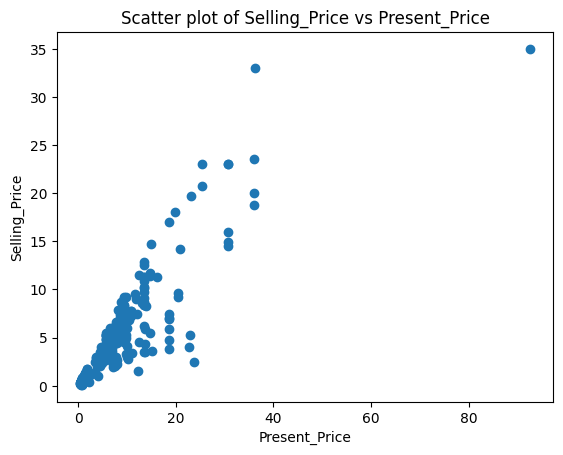

In [23]:
# Scatter plot of Selling_Price vs Present_Price
plt.scatter(car_df['Present_Price'], car_df['Selling_Price'])
plt.xlabel('Present_Price')
plt.ylabel('Selling_Price')
plt.title('Scatter plot of Selling_Price vs Present_Price')
plt.show()

In this code, we use the scatter() function from the matplotlib.pyplot module to create a scatter plot. We pass the 'Present_Price' column as the x-axis data and the 'Selling_Price' column as the y-axis data. The xlabel(), ylabel(), and title() functions are used to set the labels and title for the plot. Scatter plots to visualize the relationships between the target variable 'Selling_Price' and other numerical variables such as 'Present_Price' or 'Kms_Driven'. This can help identify any patterns or correlations between these variables.

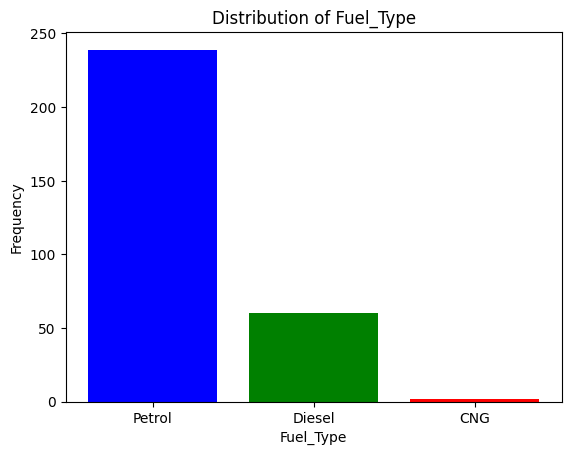

In [24]:
# Count the frequencies of each category in Fuel_Type
fuel_type_counts = car_df['Fuel_Type'].value_counts()

# Specify the color for the bars
bar_color = ['blue', 'green', 'red']  # Example colors, change as desired

# Create a bar plot with the specified color
plt.bar(fuel_type_counts.index, fuel_type_counts.values, color=bar_color)
plt.xlabel('Fuel_Type')
plt.ylabel('Frequency')
plt.title('Distribution of Fuel_Type')
plt.show()

In this code, we first use the value_counts() function to count the frequencies of each category in the 'Fuel_Type' column. We then use the bar() function from the matplotlib.pyplot module to create a bar plot. The x-axis represents the different fuel types, and the y-axis represents the frequency of each fuel type. The bar plots to visualize the distribution of categorical variables such as 'Fuel_Type', 'Seller_Type', and 'Transmission'. This will allow you to compare the frequencies of different categories and observe any variations in car prices based on these categories.

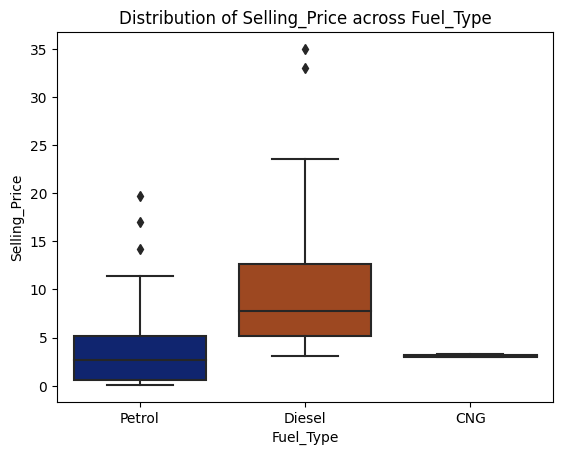

In [25]:
# Create a box plot with different colors for each category in Fuel_Type
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=car_df, palette='dark')
plt.xlabel('Fuel_Type')
plt.ylabel('Selling_Price')
plt.title('Distribution of Selling_Price across Fuel_Type')
plt.show()

In this code, we use the boxplot() function from the seaborn library to create a box plot. The x parameter represents the categorical variable 'Fuel_Type', and the y parameter represents the numerical variable 'Selling_Price'. The data parameter is set to the DataFrame 'car_df' to specify the data source. Box plots can be helpful in visualizing the distribution of car prices ('Selling_Price') across different categories such as 'Fuel_Type' or 'Seller_Type'. This will provide an overview of the price ranges and potential outliers within each category.

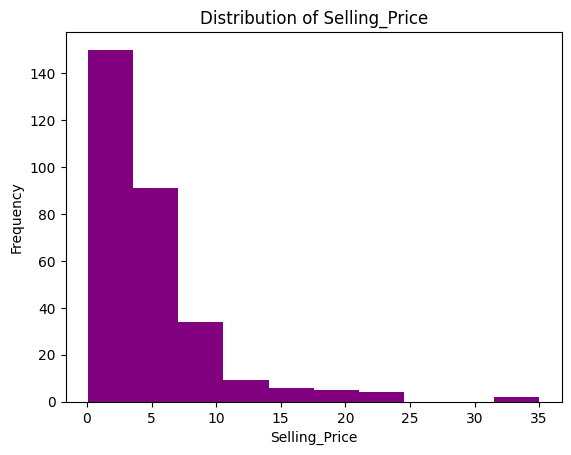

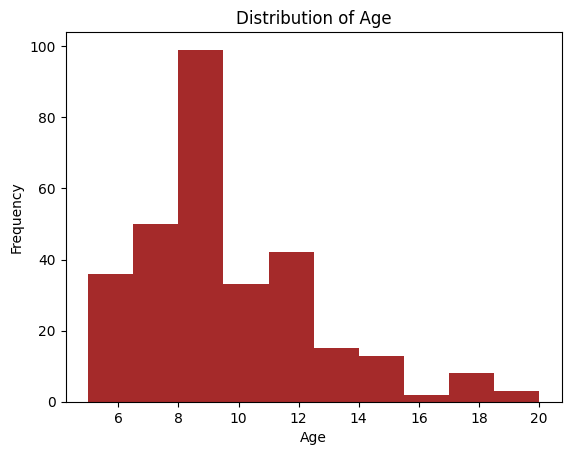

In [26]:
# Create a histogram for Selling_Price with a different color
plt.hist(car_df['Selling_Price'], bins=10, color='purple')
plt.xlabel('Selling_Price')
plt.ylabel('Frequency')
plt.title('Distribution of Selling_Price')
plt.show()

# Create a histogram for Age with a different color
plt.hist(car_df['Age'], bins=10, color='brown')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

In this code, we use the hist() function from the matplotlib.pyplot module to create histograms. The hist() function takes the numerical variable as input (e.g., 'Selling_Price' or 'Age'). The bins parameter specifies the number of bins or intervals in the histogram. Histograms is used to understand the distribution of numerical variables like 'Selling_Price' or 'Age'. This will provide insights into the frequency and spread of car prices or the age of the cars in the dataset.

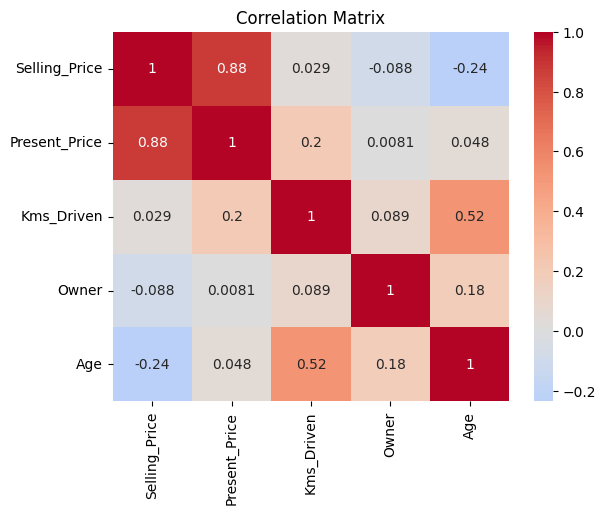

In [27]:
# Select the numerical variables for the correlation matrix
numerical_variables = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Age']
correlation_matrix = car_df[numerical_variables].corr()

# Create a heatmap with a dark-light color combination
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In this code, we first select the numerical variables of interest and calculate the correlation matrix using the corr() function. The resulting correlation matrix is then visualized as a heatmap using the heatmap() function from the seaborn library. A heatmap can display the correlation matrix of the numerical variables, including 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', and 'Age'. This will help visualize the relationships between these variables and identify any strong correlations.

# 6. Data Transformation

In [28]:
car_df_dummy.mean()

Selling_Price                 4.272359
Present_Price                 7.076578
Kms_Driven                34426.617940
Owner                         0.043189
Age                           9.372093
Fuel_Type_CNG                 0.006645
Fuel_Type_Diesel              0.199336
Fuel_Type_Petrol              0.794020
Seller_Type_Dealer            0.647841
Seller_Type_Individual        0.352159
Transmission_Automatic        0.132890
Transmission_Manual           0.867110
dtype: float64

In [29]:
car_df_dummy.std()

Selling_Price                 3.749446
Present_Price                 6.162499
Kms_Driven                23726.441467
Owner                         0.247915
Age                           2.891554
Fuel_Type_CNG                 0.081378
Fuel_Type_Diesel              0.400166
Fuel_Type_Petrol              0.405089
Seller_Type_Dealer            0.478439
Seller_Type_Individual        0.478439
Transmission_Automatic        0.340021
Transmission_Manual           0.340021
dtype: float64

- 1. square root transformation
- 2. cube root transformation

In [30]:
car_df_dummy['Selling_Price_trans'] = (car_df_dummy['Selling_Price'])**.35
car_df_dummy['Present_Price_trans'] = np.cbrt(car_df_dummy['Present_Price'])
car_df_dummy['Kms_Driven_trans'] = np.sqrt(car_df_dummy['Kms_Driven'])

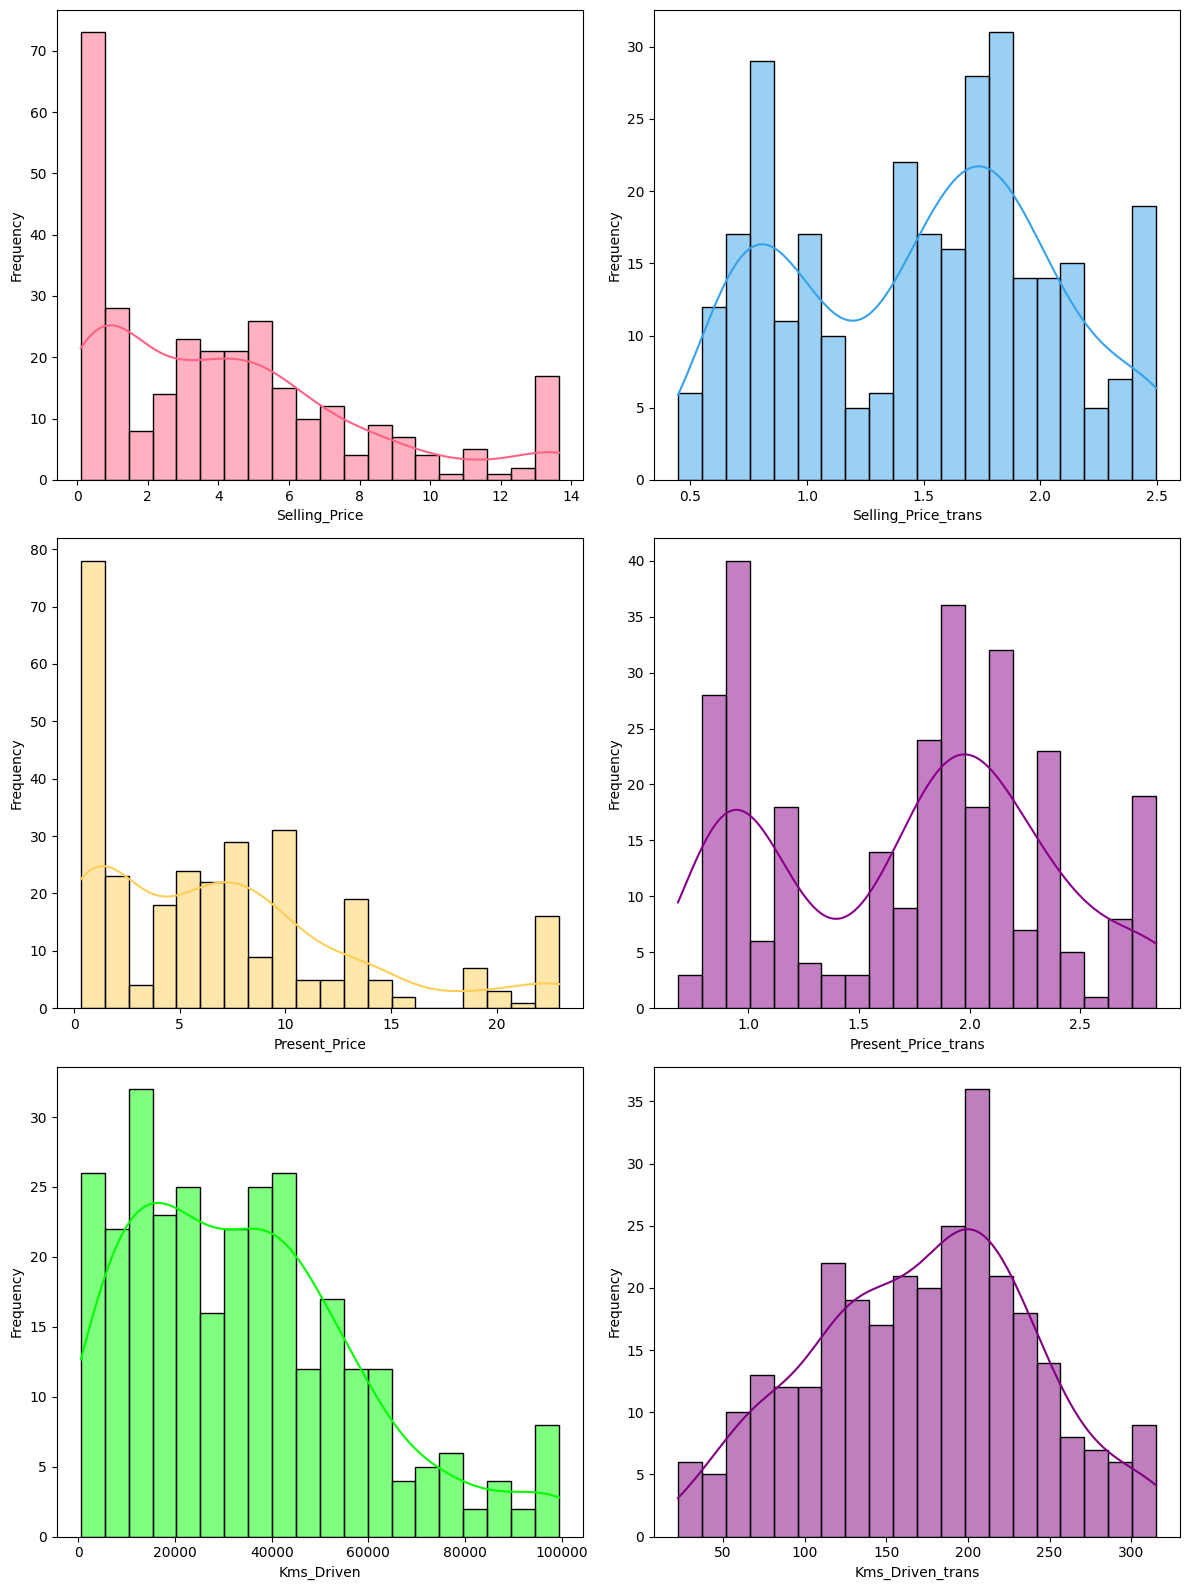

In [31]:

# Define the colors for each histogram
colors = ['#FF6384', '#36A2EB', '#FFCE56', '#8B008B', '#00FF00', '#800080']

# Create subplots
fig1, axes = plt.subplots(3, 2)
fig1.set_size_inches(12, 16)

# Plot 1: Histogram of Selling_Price
plot = sns.histplot(car_df_dummy['Selling_Price'], kde=True, bins=20, ax=axes[0][0], color=colors[0])
axes[0][0].set_xlabel('Selling_Price')
axes[0][0].set_ylabel('Frequency')

# Plot 2: Histogram of Selling_Price_trans
plot = sns.histplot(car_df_dummy['Selling_Price_trans'], kde=True, bins=20, ax=axes[0][1], color=colors[1])
axes[0][1].set_xlabel('Selling_Price_trans')
axes[0][1].set_ylabel('Frequency')

# Plot 3: Histogram of Present_Price
plot = sns.histplot(car_df_dummy['Present_Price'], kde=True, bins=20, ax=axes[1][0], color=colors[2])
axes[1][0].set_xlabel('Present_Price')
axes[1][0].set_ylabel('Frequency')

# Plot 4: Histogram of Present_Price_trans
plot = sns.histplot(car_df_dummy['Present_Price_trans'], kde=True, bins=20, ax=axes[1][1], color=colors[3])
axes[1][1].set_xlabel('Present_Price_trans')
axes[1][1].set_ylabel('Frequency')

# Plot 5: Histogram of Kms_Driven
plot = sns.histplot(car_df_dummy['Kms_Driven'], kde=True, bins=20, ax=axes[2][0], color=colors[4])
axes[2][0].set_xlabel('Kms_Driven')
axes[2][0].set_ylabel('Frequency')

# Plot 6: Histogram of Kms_Driven_trans
plot = sns.histplot(car_df_dummy['Kms_Driven_trans'], kde=True, bins=20, ax=axes[2][1], color=colors[5])
axes[2][1].set_xlabel('Kms_Driven_trans')
axes[2][1].set_ylabel('Frequency')

# Adjust subplot spacing
plt.tight_layout()

# Display the plot
plt.show()

# 7. Splitting the Data and feature scaling

In [32]:
# Selecting the columns 'Selling_Price' to 'Kms_Driven' from the DataFrame 'car_price_dummy'
car_df_dummy_original = car_df_dummy.loc[:, 'Selling_Price': 'Kms_Driven']

# Displaying the head of the modified DataFrame
car_df_dummy_original.head()


,Selling_Price,Present_Price,Kms_Driven
0,3.35,5.59,27000.0
1,4.75,9.54,43000.0
2,7.25,9.85,6900.0
3,2.85,4.15,5200.0
4,4.60,6.87,42450.0


In [33]:
# Selecting the columns 'Owner' to the end of the DataFrame 'car_price_dummy'
car_df_dummy_trans = car_df_dummy.loc[:, 'Owner':]

# Displaying the head of the modified DataFrame
car_df_dummy_trans.head()


,Owner,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual,Selling_Price_trans,Present_Price_trans,Kms_Driven_trans
0,0,9,False,False,True,True,False,False,True,1.526742,1.774750,164.316767
1,0,10,False,True,False,True,False,False,True,1.725213,2.120880,207.364414
2,0,6,False,False,True,True,False,False,True,2.000407,2.143608,83.066239
3,0,12,False,False,True,True,False,False,True,1.442765,1.607001,72.111026
4,0,9,False,True,False,True,False,False,True,1.705946,1.901015,206.033978


In [34]:
# Splitting the data into features (X) and target variable (y)
X = car_df_dummy_trans.drop('Selling_Price_trans', axis=1)
y = car_df_dummy_trans['Selling_Price_trans']

In [35]:
# Importing the necessary module for train-test split
from sklearn.model_selection import train_test_split

In [36]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Printing the shape of the training and testing sets
print("x train: ", X_train.shape)
print("x test: ", X_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (240, 11)
x test:  (61, 11)
y train:  (240,)
y test:  (61,)


# 8. Building a model

- Random Forest Regression
- Gradient Boosting regression
- Linear Regression

In [37]:
# Importing the necessary modules and classes from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Linear Regression
linear_model = LinearRegression()

# Random Forest 
random_forest_model = RandomForestRegressor()

# Gradient Boosting models
gradient_boosting_model = GradientBoostingRegressor()


RandomizedSearchCV is a class in scikit-learn that enables randomized search on hyperparameters. It provides methods such as "fit" and "score" for model fitting and evaluation. Additionally, it implements other methods like "score_samples", "predict", "predict_proba", "decision_function", "transform", and "inverse_transform" if they are implemented in the chosen estimator. This allows for convenient access to various functionalities for model training, scoring, and prediction.

In [38]:
def car_pred_model(model):

    # Training model
    model.fit(X_train,y_train)

    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train = round(R2_train_model,2)

    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test = round(R2_test_model,2)

    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV = round(cv_mean,2)

    return R2_train, R2_test, cross_val, CV, y_pred_train, y_pred_test

In [39]:
# Printing results

def print_result(score_train, score_test, cv_list, cv_mean):
    
    print("Train R2-score :", score_train)
    print("Test R2-score :", score_test)
    print("Train CV scores :", cv_list)
    print("Train CV mean :", cv_mean)

In [40]:
# Plotting Graph

def plot_graph(y_train_prediction, y_test_prediction):
    # Residual Plot of train data
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    ax[0].set_title('Residual Plot of Train samples')
    sns.histplot((y_train - y_train_prediction), kde=True, ax=ax[0])
    ax[0].set_xlabel('Residuals')
    ax[0].set_ylabel('Count')

    # Y_test vs Y_train line plot
    ax[1].set_title('y_test vs y_pred_test')
    sns.lineplot(x=y_test.index, y=y_test, ax=ax[1], label='Actual')
    sns.lineplot(x=y_test.index, y=y_test_prediction, ax=ax[1], label='Predicted')
    ax[1].set_xlabel('Sample')
    ax[1].set_ylabel('Value')

    plt.tight_layout()
    plt.legend()
    plt.show()


### 1) Random Forest Regressor


A Random Forest is a machine learning technique that utilizes an ensemble of decision trees to enhance predictive accuracy and mitigate overfitting.

Here are some key parameters that influence the behavior of a Random Forest:

- n_estimators: This parameter determines the number of trees in the forest, allowing for a trade-off between model complexity and computational efficiency.
- max_depth: It controls the maximum depth or levels of each individual decision tree in the forest, affecting the model's ability to capture complex patterns.
- min_samples_split: This parameter sets the minimum number of samples required to split an internal node during tree construction, influencing the balance between expanding the tree and preventing overfitting.
- min_samples_leaf: It specifies the minimum number of samples required to be present at a leaf node. Adjusting this parameter helps control the tree's tendency to be more specific or general in its predictions.
- max_features: This parameter determines the number of features to consider when searching for the best split at each tree node. It impacts the diversity and randomness of the trees in the forest

In [41]:
rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))

# Maximum number of levels in a tree
max_depth=list(range(4,9,4))

# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))

# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]

# Number of fearures to be considered at each split
max_features=['sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

In [42]:
r2_score_train_rf, r2_score_test_rf, crossval_list_rf, CVmean_rf, y_pred_train_values_rf, y_pred_test_values_rf = car_pred_model(rf_rs)

In [43]:
print_result(r2_score_train_rf, r2_score_test_rf, crossval_list_rf, CVmean_rf)
print('Mean square error: ', mean_squared_error(y_test, y_pred_test_values_rf))

Train R2-score : 0.99
Test R2-score : 0.96
Train CV scores : [0.96092187 0.92004852 0.92122816 0.95094884 0.93292872]
Train CV mean : 0.94
Mean square error:  0.011311190877956845


In [44]:
def plot_graph(y_train_prediction, y_test_prediction):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Line plot for predicted train values
    axes[0].plot(range(len(y_train)), y_train, label='Actual Train Values', color='blue')
    axes[0].plot(range(len(y_train)), y_train_prediction, label='Predicted Train Values', color='green')
    axes[0].set_title('Predicted Train Values vs Actual Train Values')
    axes[0].set_xlabel('Data Point')
    axes[0].set_ylabel('Selling Price')
    axes[0].legend()
    
    # Scatter plot for predicted test values
    axes[1].scatter(y_test, y_test_prediction, color='red')
    axes[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='--')
    axes[1].set_title('Predicted Test Values vs Actual Test Values')
    axes[1].set_xlabel('Actual Test Values')
    axes[1].set_ylabel('Predicted Test Values')
    
    plt.tight_layout()
    plt.show()


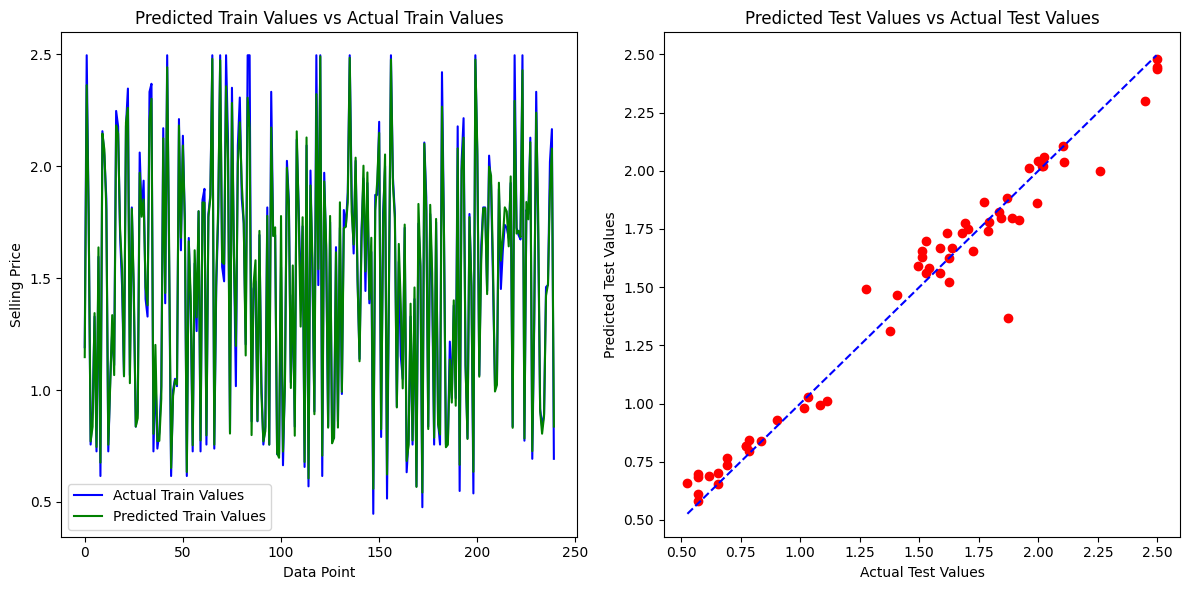

In [45]:
plot_graph(y_pred_train_values_rf, y_pred_test_values_rf)

In [46]:
print(rf_rs.best_estimator_)

RandomForestRegressor(max_depth=8, max_features='sqrt', min_samples_split=4,
                      n_estimators=900)


### 2) Gradient Boosting regression 

The Gradient Boosting Regressor is an iterative model that builds an additive model in a forward stage-wise manner. It optimizes differentiable loss functions by fitting regression trees on the negative gradient of the loss. The key parameters for this model are:

- learning_rate: Controls the contribution of each tree by shrinking it with the learning_rate.
- n_estimators: The number of trees in the boosting process.
- max_depth: Maximum number of levels in each regression tree.
- min_samples_split: Minimum number of samples required to split an internal node.
- min_samples_leaf: Minimum number of samples required to be at a leaf node.
- max_features: The number of features to consider when finding the best split.

In [47]:
gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)

In [48]:
r2_score_train_gb, r2_score_test_gb, crossval_list_gb, CVmean_gb, y_pred_train_values_gb, y_pred_test_values_gb = car_pred_model(gb_rs)


In [49]:
print_result(r2_score_train_gb, r2_score_test_gb, crossval_list_gb, CVmean_gb)
print('Mean square error: ', mean_squared_error(y_test, y_pred_test_values_gb))

Train R2-score : 1.0
Test R2-score : 0.97
Train CV scores : [0.97622523 0.95956382 0.95954447 0.95718624 0.962906  ]
Train CV mean : 0.96
Mean square error:  0.008394634589698254


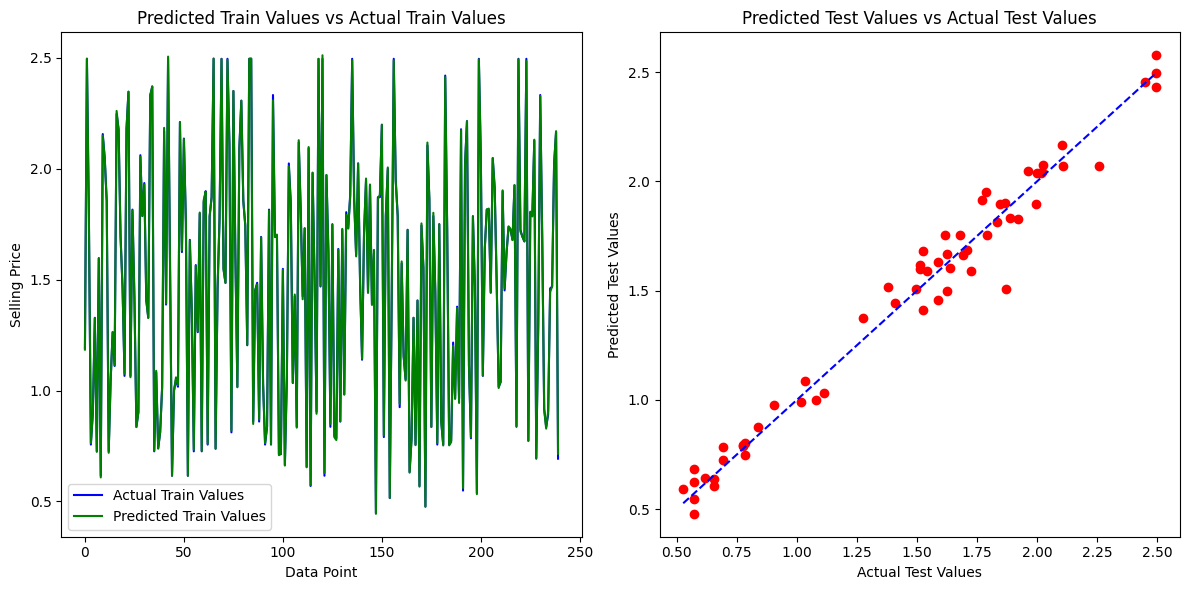

In [50]:
plot_graph(y_pred_train_values_gb, y_pred_test_values_gb)

### 3) Linear Regression 

LinearRegression is a model that fits a linear equation with coefficients (w1, ..., wp) to minimize the sum of squared differences between the observed targets and the targets predicted by the linear approximation. Its goal is to find the best-fitting straight line that represents the relationship between the input variables and the target variable in the dataset.

In [51]:
lr = LinearRegression()

In [52]:
r2_score_train_lr, r2_score_test_lr, crossval_list_lr, CVmean_lr, y_pred_train_values_lr, y_pred_test_values_lr= car_pred_model(lr)

In [53]:
print_result(r2_score_train_lr, r2_score_test_lr, crossval_list_lr, CVmean_lr)
print('Mean square error: ', mean_squared_error(y_test, y_pred_test_values_lr))

Train R2-score : 0.96
Test R2-score : 0.96
Train CV scores : [0.96105455 0.96359721 0.95413362 0.95970952 0.94272748]
Train CV mean : 0.96
Mean square error:  0.01335704662198631


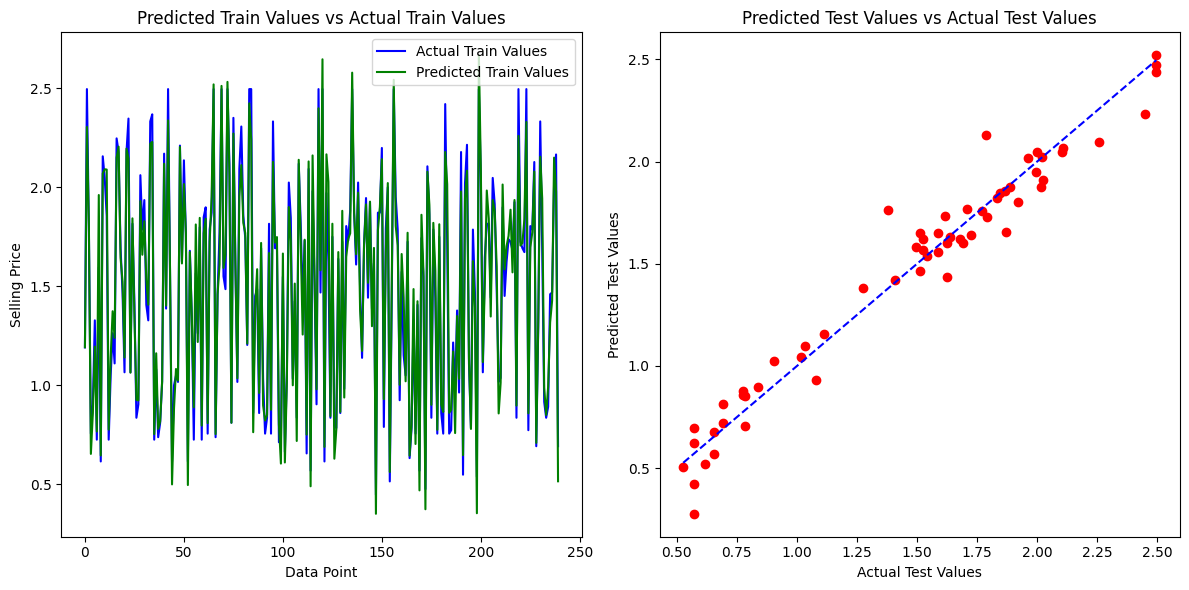

In [54]:
plot_graph(y_pred_train_values_lr, y_pred_test_values_lr)

# 9) Conclusion 

In [55]:
print(f"{'Model Name':30} {'R2_score (Train)':17} {'R2_score (Test)':17} {'Cross_Value (mean)':20} {'MSE':6}")
print('-'*95)
print(f"{'GradientBoostingRegressor':30} {r2_score_train_gb:<17} {r2_score_test_gb:<17} {CVmean_gb:<20} {mean_squared_error(y_test, y_pred_test_values_gb):<6}")
print(f"{'RandomForestRegressor':30} {r2_score_train_rf:<17} {r2_score_test_rf:<17} {CVmean_rf:<20} {mean_squared_error(y_test, y_pred_test_values_rf):<6}")
print(f"{'LinearRegression':30} {r2_score_train_lr:<17} {r2_score_test_lr:<17} {CVmean_lr:<20} {mean_squared_error(y_test, y_pred_test_values_lr):<6}")

Model Name                     R2_score (Train)  R2_score (Test)   Cross_Value (mean)   MSE   
-----------------------------------------------------------------------------------------------
GradientBoostingRegressor      1.0               0.97              0.96                 0.008394634589698254
RandomForestRegressor          0.99              0.96              0.94                 0.011311190877956845
LinearRegression               0.96              0.96              0.96                 0.01335704662198631


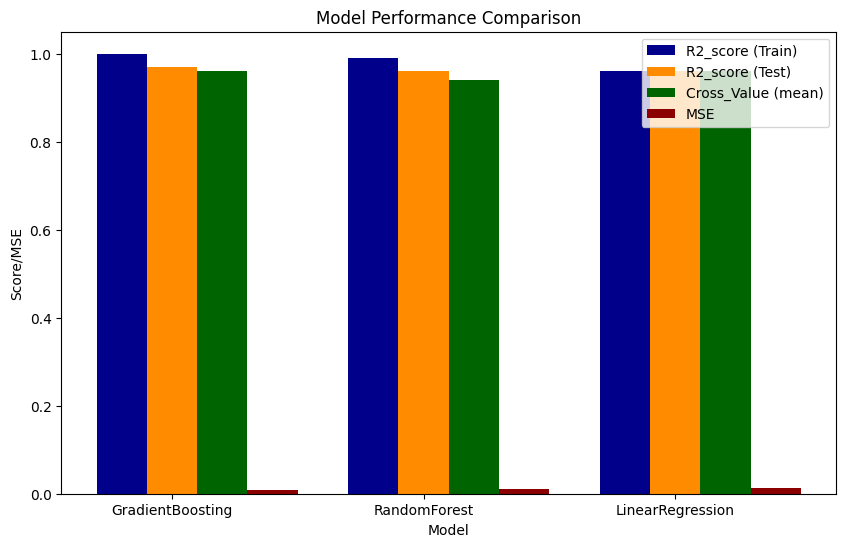

In [56]:
# Plotting final result

model_names = ['GradientBoosting', 'RandomForest', 'LinearRegression']
r2_scores_train = [r2_score_train_gb, r2_score_train_rf, r2_score_train_lr]
r2_scores_test = [r2_score_test_gb, r2_score_test_rf, r2_score_test_lr]
cv_means = [CVmean_gb, CVmean_rf, CVmean_lr]
mse_values = [mean_squared_error(y_test, y_pred_test_values_gb), mean_squared_error(y_test, y_pred_test_values_rf), mean_squared_error(y_test, y_pred_test_values_lr)]

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(model_names))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plot the bars
plt.figure(figsize=(10, 6))
plt.bar(r1, r2_scores_train, color='darkblue', width=bar_width, label='R2_score (Train)')
plt.bar(r2, r2_scores_test, color='darkorange', width=bar_width, label='R2_score (Test)')
plt.bar(r3, cv_means, color='darkgreen', width=bar_width, label='Cross_Value (mean)')
plt.bar(r4, mse_values, color='darkred', width=bar_width, label='MSE')

# Add xticks and labels
plt.xlabel('Model')
plt.ylabel('Score/MSE')
plt.title('Model Performance Comparison')
plt.xticks([r + bar_width for r in range(len(model_names))], model_names)

# Add legend
plt.legend()

# Show the plot
plt.show()


### Among the three models evaluated, the GradientBoostingRegressor demonstrates the highest R2 scores and the lowest mean square error (MSE). These results indicate that the GradientBoostingRegressor outperforms the other two models and can be considered as the best model among them. 